In [2]:
import os
import pandas as pd
import math
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))
sys.path.append('/home/ak/Documents/Research/PaperCode/singlekernelclf')
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import multiprocessing
import math
import seaborn as sns

## pull in all the various utils I need

In [3]:
from fileutils import DataLoader as DataLoader
from fileutils import paths
from fileutils import new_feature_utils as nfu

## where figures will get stored

In [4]:
figuresDestination ='/home/ak/Documents/Research/Papers/HybridLearningPaper/figures/'
symbols = os.listdir(paths('symbols_features'))

alternate_labels_nos = [1, 2, 3, 4, 5, 6]  # we have 7 alternative data types

mainPath = paths('main')

locationPath = os.path.join(mainPath,'ExperimentCommonLocs/')

labelsTitles = [f for f in os.listdir(locationPath) if str('LabelsA') in f]
labelsTitles = [f for f in os.listdir(locationPath) if str('LabelsA') in f]

In [5]:
def labelsPath(mainPath, idx):
    locationPath = os.path.join(mainPath,'ExperimentCommonLocs/')


    
    labelsDictLoc = {'1':'LabelsAlternateOne',
                     '2':'LabelsAlternateTwo',
                     '3':'LabelsAlternateThree',
                     '4':'LabelsAlternateFour',
                     '5':'LabelsAlternateFive',
                     '6':'LabelsAlternateSix',
                     '7':'LabelsAlternateSeven'
                     
                    }
    labelsPath = os.path.join(locationPath, labelsDictLoc[idx])
    
    if os.path.isdir(labelsPath):
        return labelsPath
    else:
        print('Not a valid Label')
        
def symbol_feature_paths(mainPath, symbol):
    """
    mainPath: is the main path created in Dataloader
    symbol
    returns: symbol paths dictionary indexed by keys which are dates
    keys: which are the dates for the symbol's features paths
    """
    
    symbolData = DataLoader(mainPath, symbol)
    hmm_dates_list = sorted(symbolData.hmm_dates_list) ## all hmm model dates
    hmm_date_indx = 0 # pick a model date index
    hmm_date = hmm_dates_list[hmm_date_indx]  # pull out the date
    hmm_features_date_path = os.path.join(symbolData.symbol_features_path, hmm_date)
    symbol_feature_paths = {feature_file.split("_")[5]: os.path.join(hmm_features_date_path, feature_file) for
                            f, feature_file in enumerate(sorted(os.listdir(hmm_features_date_path)))}
    
    return symbol_feature_paths

In [10]:
labelIdx = '2' # pick the label-idx 


# path for the label that has all the symbols
mainLabelPath =labelsPath(mainPath, labelIdx) 
print(mainLabelPath)
# take out all the symbols
symbols = os.listdir(mainLabelPath) 
print(symbols) # list of symbols

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateTwo
['LGEN.L', 'SMIN.L', 'NG.L', 'BLT.L', 'KGF.L', 'PRU.L', 'SHP.L', 'RTO.L', 'BATS.L', 'ULVR.L', 'RR.L', 'CPI.L', 'UU.L', 'RDSa.L', 'RSA.L', 'SPT.L', 'CEY.L', 'RB.L', 'TSCO.L', 'ITV.L', 'PSON.L', 'SDR.L', 'APF.L', 'STAN.L', 'REL.L', 'AZN.L', 'CCL.L', 'SGE.L', 'RDSb.L', 'LLOY.L', 'MKS.L', 'WPP.L', 'CPG.L', 'BARC.L', 'AV.L', 'AAL.L', 'VOD.L', 'MAB.L', 'RBS.L', 'LAND.L']



## pick a symbol

### functions that can be used

In [7]:

labelSymbolDict = dict()
dict_pct_no_move ={}
for symbol in symbols:

    symbol_Main_LabelsPath = os.path.join(mainLabelPath, symbol)
    labelSymbolDict[symbol] =(os.listdir(symbol_Main_LabelsPath))

    ## now for the specific symbol that you have chosen

    symbol_Label_Paths  = {labelSymbolDict[symbol][f].split(".")[0]:os.path.join(symbol_Main_LabelsPath, labelSymbolDict[symbol][f]) for f,_ in enumerate(labelSymbolDict[symbol])}    
    ## make a dictionary that has 

    labelsValuesDict = dict()
    for date in list(symbol_Label_Paths.keys()):
        dataDf = pd.read_csv(symbol_Label_Paths[date])
        label_name = str(dataDf.columns[dataDf.columns.str.contains(pat='label')].values[0])

        labelsValuesDict[date] = dataDf[label_name] # keep the values of the labels only

    df_across_dates = pd.DataFrame.from_dict(labelsValuesDict)
    df_across_dates_values = df_across_dates.apply(pd.Series.value_counts) 
    df_pcts = pd.DataFrame()
    df_pcts[0]= df_across_dates_values.loc[0]/(df_across_dates_values.loc[0]+df_across_dates_values.loc[1]+df_across_dates_values.loc[-1])
    df_pcts[1] = 1- df_pcts[0]
    dict_pct_no_move[symbol] = df_pcts[0]


In [8]:
print(label_name)
df_across_dates_values

NameError: name 'label_name' is not defined

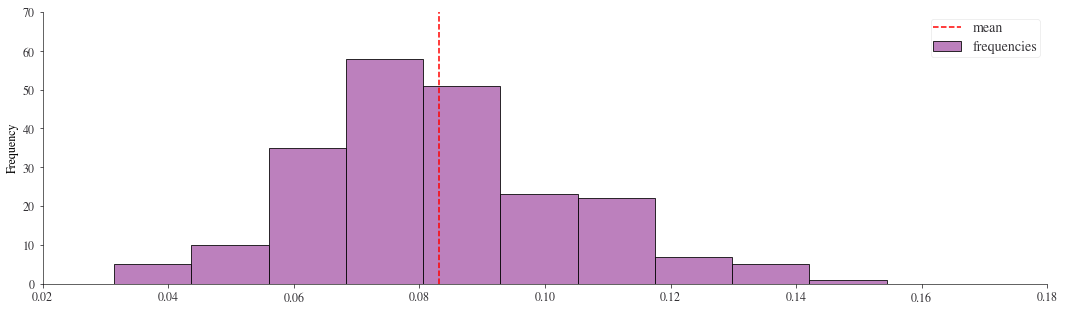

In [56]:
df_across_time = pd.DataFrame.from_dict(dict_pct_no_move).median(axis=1)
f, ax = plt.subplots(figsize = (18 ,5))
df_across_time.plot.hist(label='frequencies')

_ = plt.axvline(x = df_across_time.mean(), color='r', linewidth = 1.5, linestyle="--", label='mean' )
_ =ax.legend(fontsize = 14)
title = label_name+'_across_time_histo.png'
target_path = os.path.join(figuresDestination, title)

plt.savefig(target_path)

In [1]:
df_across_symbols = pd.DataFrame.from_dict(dict_pct_no_move).median(axis=0)
df_across_symbols.mean()

NameError: name 'pd' is not defined

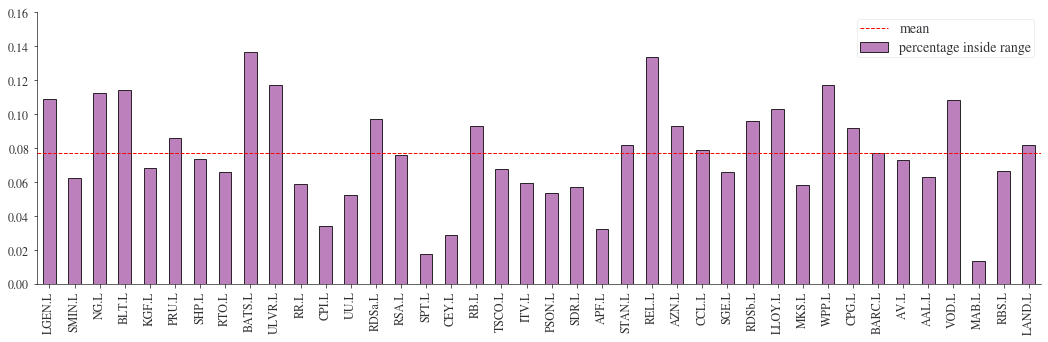

In [58]:
f, ax = plt.subplots(figsize = (18 ,5))
df_across_symbols.plot.bar(label ='percentage inside range')
_=plt.axhline(y = df_across_symbols.mean(), color='r', linewidth = 1, linestyle="--", label='mean' )
_ = ax.legend(fontsize = 14)
title = label_name+'_across_symbols_bar_plot.png'
target_path = os.path.join(figuresDestination, title)

plt.savefig(target_path)

In [51]:
def labels_dicionaries(keys, alternate_labels_nos):
    label_date_dict = defaultdict(dict)
    label_names = dict()
    value_counts_dict =dict()
    
    for label_idx in alternate_labels_nos:    
        for key_idx, key in enumerate(keys): # this is a date
            labels_file_path = os.path.join(symbolData.symbol_specific_label_path(label_idx), key + ".csv")
            labels = pd.read_csv(labels_file_path) # load all the labels
            label_name = str(labels.columns[labels.columns.str.contains(pat='label')].values[0]) #strip the name
            labels_values = labels[label_name] # keep the values of the labels only
            label_date_dict[key][label_idx] = (labels_values) # tag label values into a dictionary
            label_names[label_idx] = label_name # keep the label names
            value_counts_dict[key] =pd.DataFrame.from_dict(label_date_dict[key]).apply(pd.Series.value_counts) # do a simple count of numbers of each label values
    return label_date_dict, value_counts_dict, label_names

In [13]:

def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file



def relative_movements(df, label_idx):
    global proportionMoveNoMove
    
    if math.isnan(df[label_idx][-1]) == True:
        
        proportionMoveNoMove = df[label_idx][1]/df[label_idx][0] # move to no move
    
    elif math.isnan(df[label_idx][0]) == True:
        
        proportionMoveNoMove = df[label_idx][1]/df[label_idx][-1] # move up versus move down
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][1]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][0]) == True:
        pass
    
    elif math.isnan(df[label_idx][0]) == True and math.isnan(df[label_idx][1]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][1]) == True and math.isnan(df[label_idx][0]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) != True and math.isnan(df[label_idx][1]) != True and math.isnan(df[label_idx][0]) != True:
        
        proportionMoveNoMove = (df[label_idx][1] + df[label_idx][-1]) /df[label_idx][0] # move to no move
                
    return proportionMoveNoMove
    

#### various inputs- will need to iterate over

In [ ]:
def symbol_feature_paths(mainPath, symbol):
    """
    mainPath: is the main path created in Dataloader
    symbol
    returns: symbol paths dictionary indexed by keys which are dates
    keys: which are the dates for the symbol's features paths
    """
    
    symbolData = DataLoader(mainPath, symbol)
    hmm_dates_list = sorted(symbolData.hmm_dates_list) ## all hmm model dates
    hmm_date_indx = 0 # pick a model date index
    hmm_date = hmm_dates_list[hmm_date_indx]  # pull out the date
    hmm_features_date_path = os.path.join(symbolData.symbol_features_path, hmm_date)
    symbol_feature_paths = {feature_file.split("_")[5]: os.path.join(hmm_features_date_path, feature_file) for
                            f, feature_file in enumerate(sorted(os.listdir(hmm_features_date_path)))}

   
    return symbol_feature_paths
# for key in keys:  # <--- this is the label key in older versions of the code!


# all sorts of analysis needed for the label distribution
# for every key, which represents a data, label_date_dict[key], we get a dictionary that has 7 keys (1-7) which represent the keys for the labels. For some random date/"key", you get:
# label_date_dict[key] = {{1: 0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... }

# label_date_dict[key].keys() = dict_keys([1, 2, 3, 4, 5, 6, 7])

# value_counts, returns basically the number of 0, 1, -1 in the dataframe and label_names- plain names

            
def relative_movement_calculation(keys):

    label_date_dict, value_counts_dict, label_names =labels_dicionaries(keys, alternate_labels_nos)
    relative_movement_dict  = defaultdict(dict)
    for key in keys:
        for label_no in alternate_labels_nos:
            print('##############Date:',key, '################ & Label: ', label_no)
            relative_movement_dict[key][label_no]  = (relative_movements(value_counts_dict[key], label_no))
           # print(relative_movement_dict)
        return relative_movement_dict

In [ ]:

# for symbol in symbols:
symbolData = DataLoader(mainPath, symbol)
paths = symbol_feature_paths(mainPath, symbol)
keys = sorted(list(paths.keys()))
print(keys)


#     ## main piece of code is here ## 

# relative_movement_dict = relative_movement_calculation(keys)
# relative_movement_dict.keys()
# dfDatesLabels = pd.DataFrame.from_dict(relative_movement_dict, orient= "index")

# df_across_dates[str(symbol)] = dfDatesLabels #.median(axis=0)

In [ ]:
relative_movement_dict = relative_movement_calculation(keys)
relative_movement_dict.keys()
dfDatesLabels = pd.DataFrame.from_dict(relative_movement_dict, orient= "index")

In [ ]:
label_date_dict = defaultdict(dict)
label_names = dict()
value_counts_dict =dict()
    
for label_idx in alternate_labels_nos:    
    for key_idx, key in enumerate(keys): # this is a date
        labels_file_path = os.path.join(symbolData.symbol_specific_label_path(label_idx), key + ".csv")
        labels = pd.read_csv(labels_file_path) # load all the labels
        label_name = str(labels.columns[labels.columns.str.contains(pat='label')].values[0]) #strip the name
        labels_values = labels[label_name] # keep the values of the labels only
        label_date_dict[key][label_idx] = (labels_values) # tag label values into a dictionary
        label_names[label_idx] = label_name # keep the label names
        value_counts_dict[key] =pd.DataFrame.from_dict(label_date_dict[key]).apply(pd.Series.value_counts) # do a simple count of numbers of each label values

In [ ]:
pd.read_csv(os.path.join(labelsAnalysisResults,"LabelsProportionsAcrossDates.csv"))

In [ ]:
relative_movement_dict

In [ ]:
df_across_dates

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, constrained_layout = True)
ax1 =sns.distplot(df_across_dates.iloc[1], bins =10)
ax2 =sns.distplot(df_across_dates.iloc[2], bins =10)

In [ ]:
_=sns.distplot(df_across_dates.iloc[0], bins =10)
plt.axvline(df_across_dates.iloc[6].median(), linestyle = '--', color = 'purple', label ='median of label 7')
_=plt.xlabel("Proportion of move to no move")
plt.legend()
# figName = os.path.join(figuresDestination, 'Labe71Distribution.png')
# plt.savefig(figName , dpi =150 )

In [ ]:
df_across_dates.head(4)

In [ ]:
df_across_dates.median(axis=1)

In [ ]:
sns.displot(df_across_dates.median(axis=1))

In [ ]:
_=sns.distplot(df_across_dates.iloc[7], bins =10)
plt.axvline(df_across_dates.iloc[7].median(), linestyle = '--', color = 'purple', label ='median of label 7')
_=plt.xlabel("Proportion of move to no move")
plt.legend()
# figName = os.path.join(figuresDestination, 'Label7Distribution.png')
# plt.savefig(figName , dpi =150 )

In [ ]:
ax[0, 0] = sns.distplot(df_across_dates.iloc[1], bins =10)

In [ ]:
pd.options.display.float_format = '{:.2}'.format
#print(df_across_dates.to_latex(index=True))
df_across_dates = df_across_dates
df_across_dates.median(axis=1).T

In [ ]:
print(df_across_dates.median(axis=1).to_latex(index=True))  #[(6)]

In [ ]:
plt.figure(figsize=(10,5))
df_across_dates.iloc[1].median(axis=1)
